In [5]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import citipy to determine the citites based on latitude and longitude
from citipy import citipy

In [6]:
# generate random geographic coordinates and a list of cities 

In [7]:
# generate cities list using citipy library 

# create empty list for holding the latitude and longitude combinations
lat_lng = []

# create empty list for holding the citites names
cities = []

# set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of rangom lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, add it to our citites list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")        


Number of cities in the list: 592


In [8]:
# create plots to showcase the relationship between weather variables and latitude 
# use OpenWeatherMap API to retrieve weather data from the cities list 

In [9]:
# create empty list to fetch weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval      ")
print("------------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in list to fetch weather data
for i, city in enumerate(cities):
    
    # set the API base URL (imperial = fahrenheit)
    url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}'
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # add 1 to the record count
    record_count += 1
    
    # run an API request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(url).json()
        
        # look at the data
        # city_weather
        
        # parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # append the city information into city_data list
        city_data.append({"city": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | mambusao
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | sinabang
Processing Record 7 of Set 1 | ternate
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | holualoa
Processing Record 10 of Set 1 | coyhaique
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | rosarito
Processing Record 16 of Set 1 | san fernando de apure
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | sola
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | kabinda
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | dudinka
Proces

Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | ust-tsilma
Processing Record 40 of Set 4 | arrecife
Processing Record 41 of Set 4 | kailua-kona
Processing Record 42 of Set 4 | chonchi
Processing Record 43 of Set 4 | horta
Processing Record 44 of Set 4 | greenville
Processing Record 45 of Set 4 | altayskoye
Processing Record 46 of Set 4 | san lawrenz
Processing Record 47 of Set 4 | whangarei
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | constantia
Processing Record 0 of Set 5 | bilibino
Processing Record 1 of Set 5 | callao
Processing Record 2 of Set 5 | jinghong
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | villa rica
Processing Record 5 of Set 5 | peace river
Processing Record 6 of Set 5 | aykhal
Processing Record 7 of Set 5 | vadso
Processing Record 8 of Set 5 | rongelap
Processing Record 9 of Set 5 | greymouth
Processing Record 10 of Set 5 | narok
Processing Record 11 of Set 5 | tarquinia
Processing Record 12 of S

Processing Record 29 of Set 8 | ingeniero jacobacci
City not found. Skipping...
Processing Record 30 of Set 8 | vorkuta
City not found. Skipping...
Processing Record 31 of Set 8 | fale old settlement
Processing Record 32 of Set 8 | hafar al-batin
Processing Record 33 of Set 8 | nishinoomote
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | nagqu
Processing Record 36 of Set 8 | cradock
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | jiexiu
Processing Record 39 of Set 8 | bou tlelis
Processing Record 40 of Set 8 | dakoro
Processing Record 41 of Set 8 | kataragama
City not found. Skipping...
Processing Record 42 of Set 8 | kyshtovka
Processing Record 43 of Set 8 | weno
Processing Record 44 of Set 8 | tromso
Processing Record 45 of Set 8 | ylitornio
Processing Record 46 of Set 8 | justiniano posse
Processing Record 47 of Set 8 | vanino
Processing Record 48 of Set 8 | nunchritz
Processing Record 49 of Set 8 | vilyuchinsk
Processing Record

Processing Record 20 of Set 12 | jinchang
Processing Record 21 of Set 12 | bikenibeu village
Processing Record 22 of Set 12 | kamyzyak
Processing Record 23 of Set 12 | gebeit
Processing Record 24 of Set 12 | el nido
Processing Record 25 of Set 12 | altay
Processing Record 26 of Set 12 | granbury
Processing Record 27 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 28 of Set 12 | iwanai
Processing Record 29 of Set 12 | usinsk
Processing Record 30 of Set 12 | houghton
Processing Record 31 of Set 12 | khanabad
Processing Record 32 of Set 12 | isangel
Processing Record 33 of Set 12 | lichtenrade
Processing Record 34 of Set 12 | mae hong son
Processing Record 35 of Set 12 | nola
Processing Record 36 of Set 12 | svetlyy
Processing Record 37 of Set 12 | kuta
Processing Record 38 of Set 12 | magong
Processing Record 39 of Set 12 | malanje
Processing Record 40 of Set 12 | kaa-khem
Processing Record 41 of Set 12 | neryungri
----------------------------
Data Retrieval Complete

In [10]:
# convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

city          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# display the sample data
city_data_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,43.52,92,100,8.50,AU,1684434976
1,mambusao,11.4289,122.5961,75.96,90,100,1.99,PH,1684434977
2,ilulissat,69.2167,-51.1000,35.62,87,75,6.91,GL,1684434977
3,papatowai,-46.5619,169.4708,49.28,92,100,3.44,NZ,1684434978
4,grytviken,-54.2811,-36.5092,38.71,84,19,13.31,GS,1684434979


In [12]:
# export the city_data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="city_id")

In [13]:
# read the saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="city_id")

# display sample data
city_data_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
city_id,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,43.52,92,100,8.50,AU,1684434976
1,mambusao,11.4289,122.5961,75.96,90,100,1.99,PH,1684434977
2,ilulissat,69.2167,-51.1000,35.62,87,75,6.91,GL,1684434977
3,papatowai,-46.5619,169.4708,49.28,92,100,3.44,NZ,1684434978
4,grytviken,-54.2811,-36.5092,38.71,84,19,13.31,GS,1684434979


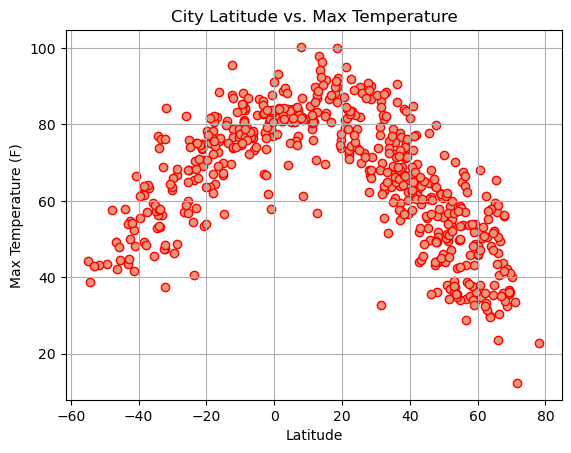

In [14]:
# build scatter plot for latitude vs. temperature 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="darksalmon", edgecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# save the figure 
plt.savefig("output_data/Fig1.png")

plt.show()

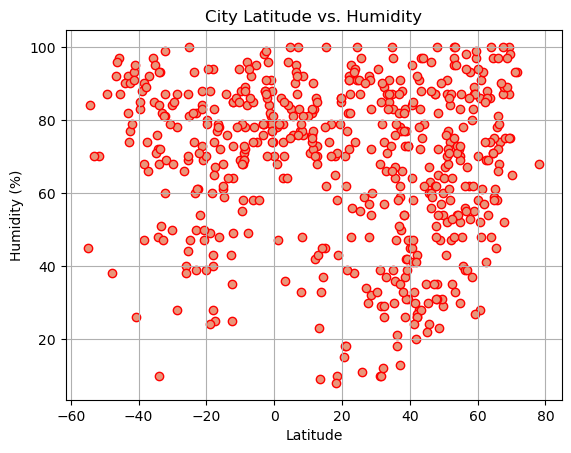

In [15]:
# build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="darksalmon", edgecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# save the figure 
plt.savefig("output_data/Fig2.png")

plt.show()

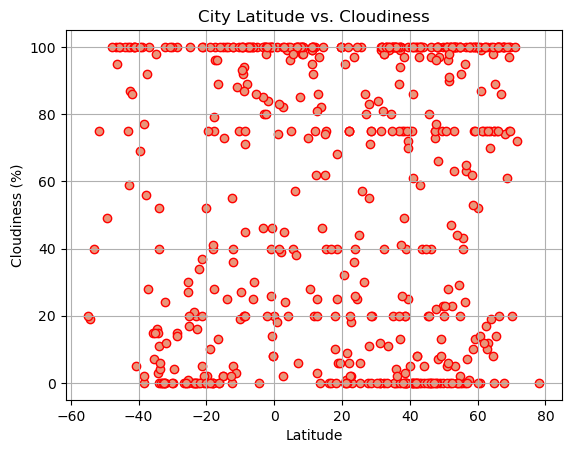

In [16]:
# build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="darksalmon", edgecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# save the figure 
plt.savefig("output_data/Fig3.png")

plt.show()

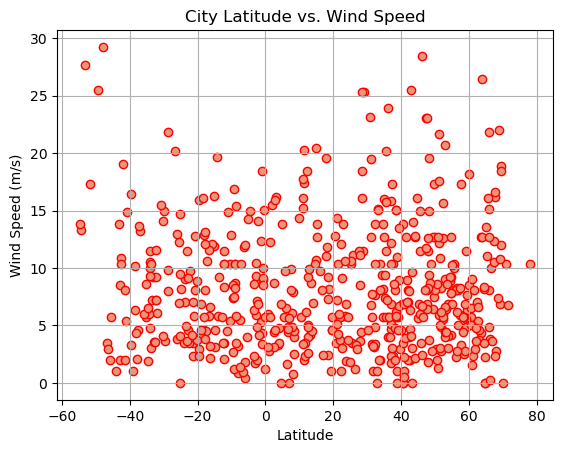

In [17]:
# build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="darksalmon", edgecolors="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# save the figure 
plt.savefig("output_data/Fig4.png")

plt.show()

In [18]:
# compute linear regression for each relationship

In [19]:
# create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
city_id,,,,,,,,,
1,mambusao,11.4289,122.5961,75.96,90,100,1.99,PH,1684434977
2,ilulissat,69.2167,-51.1000,35.62,87,75,6.91,GL,1684434977
5,sinabang,2.4803,96.3801,80.89,79,82,4.47,ID,1684434979
6,ternate,0.8000,127.4000,81.81,78,100,6.02,ID,1684434980
8,holualoa,19.6228,-155.9522,73.78,86,100,4.61,US,1684434808


In [20]:
# create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
city_id,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,43.52,92,100,8.50,AU,1684434976
3,papatowai,-46.5619,169.4708,49.28,92,100,3.44,NZ,1684434978
4,grytviken,-54.2811,-36.5092,38.71,84,19,13.31,GS,1684434979
7,port mathurin,-19.6833,63.4167,78.31,80,2,15.93,MU,1684434980
9,coyhaique,-45.5752,-72.0662,44.55,87,100,5.75,CL,1684434876


In [21]:
# temperature vs latitude linear regression plot

The r-value is: 0.673177738844293


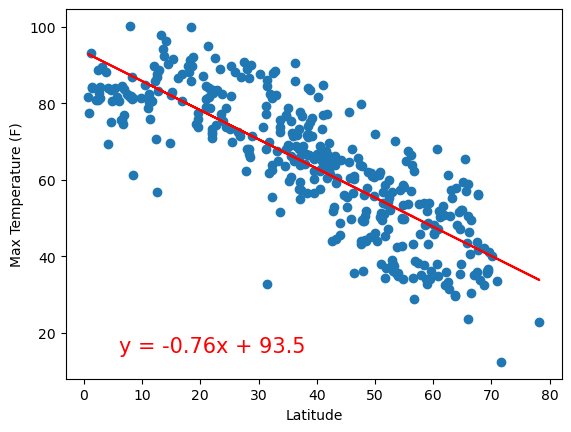

In [48]:
# linear regression on Northern Hemisphere 
temp_nh_x_values = northern_hemi_df['Lat'].astype("float")
temp_nh_y_values = northern_hemi_df['Max Temp'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_nh_x_values, temp_nh_y_values)
regress_values = temp_nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(temp_nh_x_values, temp_nh_y_values)

# plot regression line 
plt.plot(temp_nh_x_values, regress_values, "r-")
plt.annotate(line_eq, (6,15), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.6138732288061772


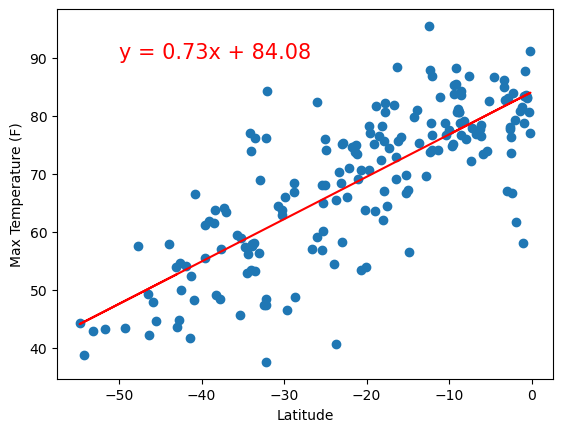

In [49]:
# linear regression on Southern Hemisphere 
temp_sh_x_values = southern_hemi_df['Lat'].astype("float")
temp_sh_y_values = southern_hemi_df['Max Temp'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_sh_x_values, temp_sh_y_values)
regress_values = temp_sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(temp_sh_x_values, temp_sh_y_values)

# plot regression line 
plt.plot(temp_sh_x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,90), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [58]:
# analysis

# Latitude (Northern Hemisphere) vs temperature had a r value of 0.673 which is a moderate negative correlation.
# This mean that as latitude increases, temperature decreases. 
# This plot shows that it gets cooler as you travel further from the equator.

# Latitude (Southern Hemisphere) vs temperature had a r value of 0.613 which is a moderate positive correlation.
# This means that as latitude increases, temperature increases 
# meaning it gets warmer as you get closer to the equator.

In [59]:
# humidity vs latitude linear regression plot

The r-value is: 0.00031122521672684284


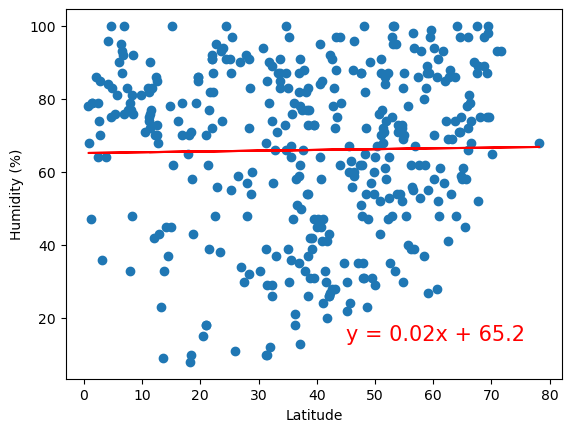

In [60]:
# linear regression on northern hemisphere 
hum_nh_x_values = northern_hemi_df['Lat'].astype("float")
hum_nh_y_values = northern_hemi_df['Humidity'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(hum_nh_x_values, hum_nh_y_values)
regress_values = hum_nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(hum_nh_x_values, hum_nh_y_values)

# plot regression line 
plt.plot(hum_nh_x_values, regress_values, "r-")
plt.annotate(line_eq, (45,14), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0008434487077453976


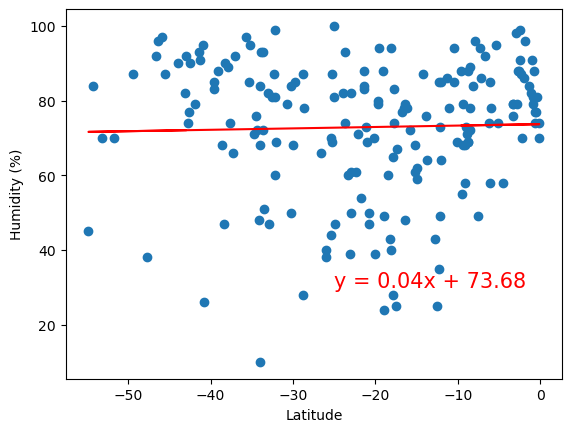

In [27]:
# linear regression on sorthern hemisphere 
hum_sh_x_values = southern_hemi_df['Lat'].astype("float")
hum_sh_y_values = southern_hemi_df['Humidity'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(hum_sh_x_values, hum_sh_y_values)
regress_values = hum_sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(hum_sh_x_values, hum_sh_y_values)

# plot regression line 
plt.plot(hum_sh_x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,30), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [28]:
# analysis 

# Latitude (Northern Hemisphere) vs humidity had a correlation coefficient of 0, 
# which means no correlation. 
# The line of regression shows that as latitude increases, humidity stays relatively the same,
# meaning humidity does not vary depending on distance from the equator.

# Latitude (Southern Hemisphere) vs humidity had an r value of 0, 
# meaning there is no correlation.
# Line of regression shows that as latitude increases, humidity stays relatively the same,
# meaning humidity does not vary depending on distance from the equator.

# These two plots confirm that there is no correlation between latitude and humidity.

In [29]:
# cloudiness vs latitude linear regression plot

The r-value is: 2.870544520931493e-05


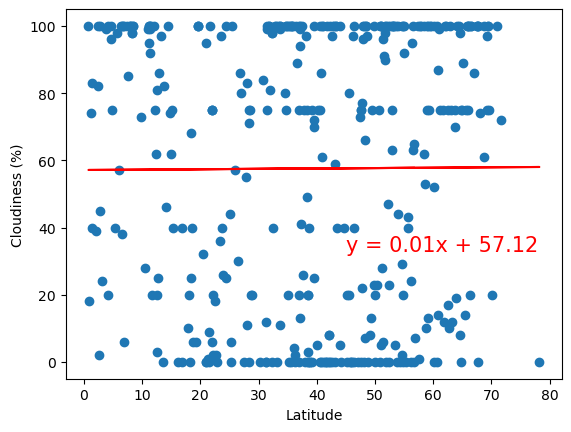

In [53]:
# linear regression on northern hemisphere 
cloud_nh_x_values = northern_hemi_df['Lat'].astype("float")
cloud_nh_y_values = northern_hemi_df['Cloudiness'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_nh_x_values, cloud_nh_y_values)
regress_values = cloud_nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(cloud_nh_x_values, cloud_nh_y_values)

# plot regression line 
plt.plot(cloud_nh_x_values, regress_values, "r-")
plt.annotate(line_eq, (45,33), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.017710690054689997


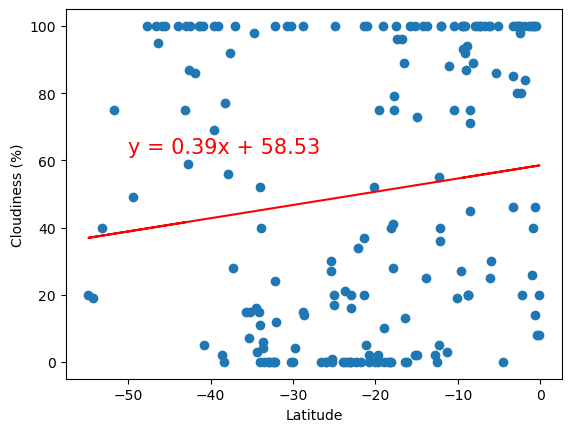

In [54]:
# linear regression on southern hemisphere 
cloud_sh_x_values = southern_hemi_df['Lat'].astype("float")
cloud_sh_y_values = southern_hemi_df['Cloudiness'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_sh_x_values, cloud_sh_y_values)
regress_values = cloud_sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(cloud_sh_x_values, cloud_sh_y_values)

# plot regression line 
plt.plot(cloud_sh_x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,62), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [32]:
# analysis 

# The r value determining the correlation between Latitude (Northern Hemisphere) and cloudiness is 0. 
# The r value is 0.0177 when looking at Latitude (Southern Hemisphere) and cloudiness. 
# This mean there is no correlation between latitude and cloudiness.

In [33]:
# wind speed vs latitude linear regression plot

The r-value is: 0.0029404015134605528


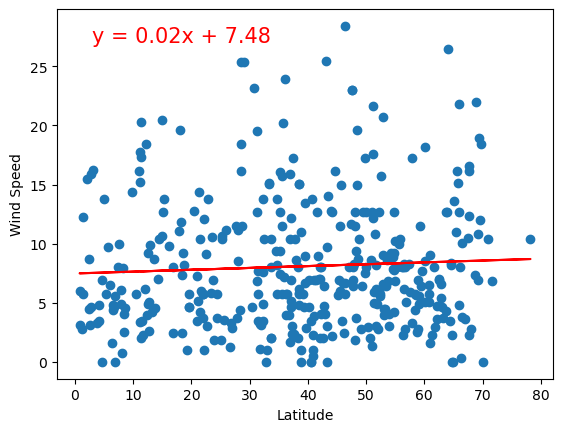

In [45]:
# linear regression on northern hemisphere 
wind_nh_x_values = northern_hemi_df['Lat'].astype("float")
wind_nh_y_values = northern_hemi_df['Wind Speed'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_nh_x_values, wind_nh_y_values)
regress_values = wind_nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(wind_nh_x_values, wind_nh_y_values)

# plot regression line 
plt.plot(wind_nh_x_values, regress_values, "r-")
plt.annotate(line_eq, (3,27), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.032162279342756124


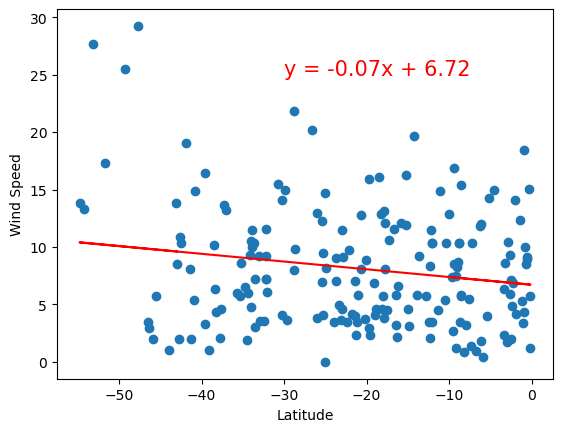

In [56]:
# linear regression on southern hemisphere 
wind_sh_x_values = southern_hemi_df['Lat'].astype("float")
wind_sh_y_values = southern_hemi_df['Wind Speed'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_sh_x_values, wind_sh_y_values)
regress_values = wind_sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(wind_sh_x_values, wind_sh_y_values)

# plot regression line 
plt.plot(wind_sh_x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,25), fontsize=15, color="red")

# label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# print r squared value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [33]:
# analysis

# Latitude (Northern Hemisphere) vs wind speed had a correlation coefficient of 0. 
# Latitude (Southern Hemisphere) vs wind speed had a r value of 0. 
# These are both very small numbers, therefore there is no correlation between latitude and wind speed. 